In [4]:
import pandas as pd
import numpy as np
from numpy import random
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, \
    accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix, \
    classification_report, roc_curve, auc, precision_recall_curve

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Content
 
0. Data Exploration and preparation
1. Logistic Regression
2. SVM, tuning parameters
3. Random Forest
4. Gradient Boosting
5. Neural Network
6. Naïve Bayes
7. Results

## 0. [Data Exploration and preparation](#Data-Exploration-and-preparation)

In [5]:
df = pd.read_csv('income.csv', sep=',')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,1
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,0,0,58,United-States,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,0,0,35,United-States,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [254]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [255]:
df.shape

(43957, 15)

In [256]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [257]:
df.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [258]:
df.dropna(inplace = True)

In [259]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

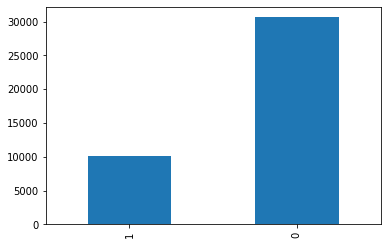

In [260]:
df['income_>50K'].value_counts().sort_values().plot(kind = 'bar');

In [7]:
df = df.sample(frac = 0.05, random_state = 10)

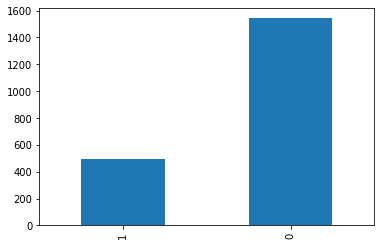

In [262]:
df['income_>50K'].value_counts().sort_values().plot(kind = 'bar');

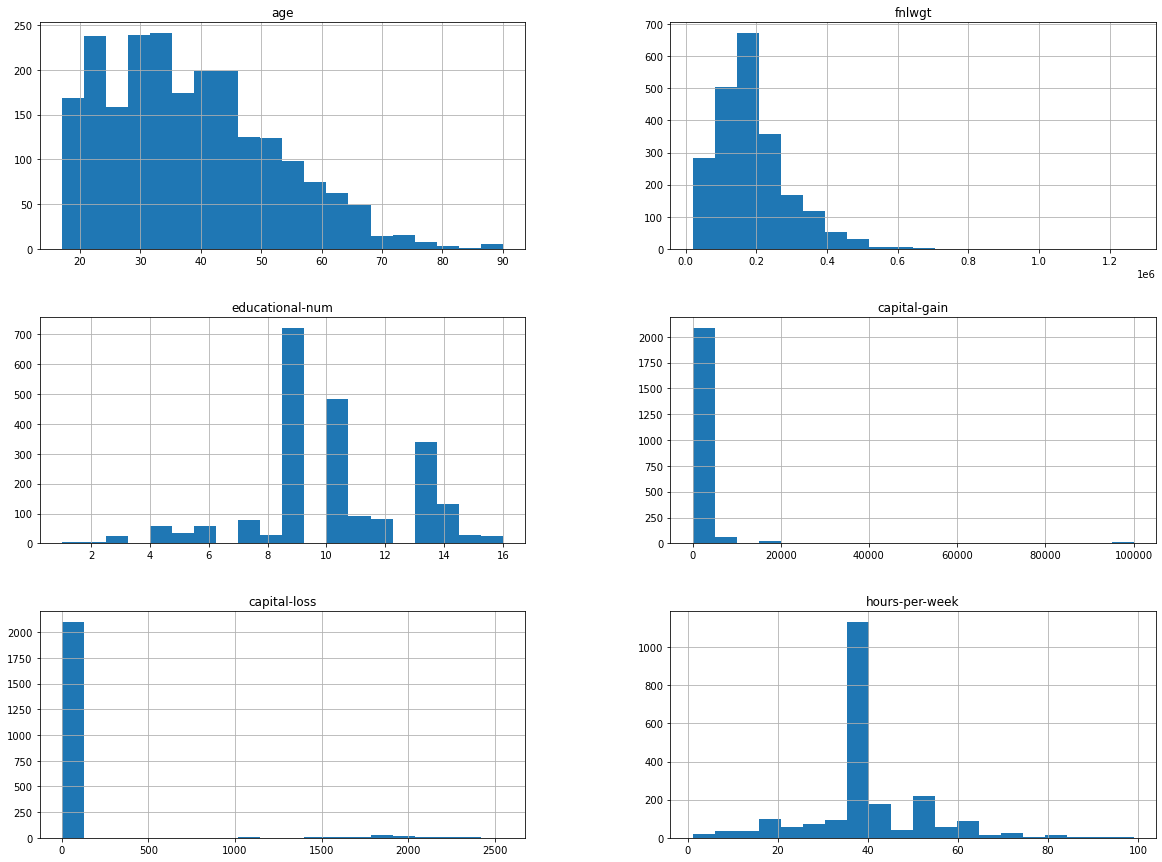

In [15]:
df.drop(['income_>50K'], axis = 1).hist(bins=20, figsize=(20, 15))
plt.show()

In [17]:
str_cols = df.dtypes[df.dtypes==object].index
df_label = pd.get_dummies(df, columns=str_cols)

In [18]:
df_label.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
38779,52,115851,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
35895,28,185647,10,0,0,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
42201,72,129912,9,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40908,46,149949,4,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
36552,50,378747,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
X = df_label.drop(['income_>50K'], axis = 1)
y = df_label['income_>50K'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=10)

## 1. Logistic Regression

In [267]:
lg = LogisticRegression(penalty='l2', max_iter = 1000)

C = np.array([5,2,1,0.1,0.01,0.001])

grid = GridSearchCV(estimator=lg, param_grid=dict(C=C), cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'C': 5.0}
Best cross validaton score 0.8022265080895746


In [268]:
Y_predicted = grid.predict(X_test)

In [269]:
accuracy_lg = metrics.accuracy_score(y_test, Y_predicted)
precision_lg = metrics.precision_score(y_test,Y_predicted)
recall_lg = metrics.recall_score(y_test, Y_predicted)
RocAuc_lg = metrics.roc_auc_score(y_test, Y_predicted)

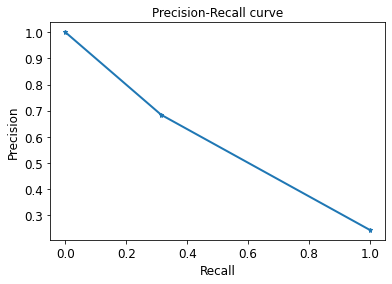

In [270]:
precision, recall, thresholds = precision_recall_curve(y_test, Y_predicted)
plt.plot(recall, precision, marker='*', linewidth=2, markersize=5,)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Precision-Recall curve')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12);

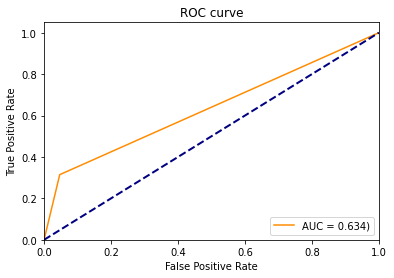

In [271]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

## 2. SVM, tuning parameters: type of kernel and cost value

In [273]:
from sklearn import svm

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [275]:
param_grid = {'C': np.array([1,0.1,0.01]),  
              'kernel': ['rbf','linear']}  
nfolds=5
grid_search = GridSearchCV(svm.SVC(gamma='auto'), param_grid, cv=nfolds, n_jobs=-1, verbose = 1)

In [276]:
grid_search.fit(X_train_s,y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=-1,
             param_grid={'C': array([1.  , 0.1 , 0.01]),
                         'kernel': ['rbf', 'linear']},
             verbose=1)

In [277]:
print("Best params:", grid_search.best_params_)
print("Best cross validaton score", grid_search.best_score_)

Best params: {'C': 1.0, 'kernel': 'linear'}
Best cross validaton score 0.8343169398907104


In [278]:
grid_search.best_estimator_

SVC(gamma='auto', kernel='linear')

In [279]:
Y_predicted_svm = grid_search.predict(X_test_s)

In [280]:
accuracy_svm = metrics.accuracy_score(y_test, Y_predicted_svm)
precision_svm = metrics.precision_score(y_test,Y_predicted_svm)
recall_svm = metrics.recall_score(y_test, Y_predicted_svm)
RocAuc_svm = metrics.roc_auc_score(y_test, Y_predicted_svm)

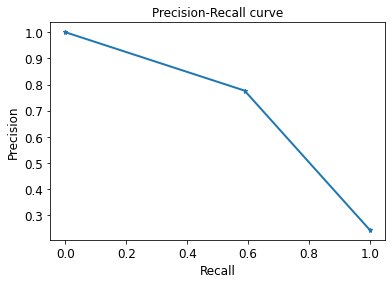

In [281]:
precision, recall, thresholds = precision_recall_curve(y_test, Y_predicted_svm)
plt.plot(recall, precision, marker='*', linewidth=2, markersize=5,)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Precision-Recall curve')
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12);

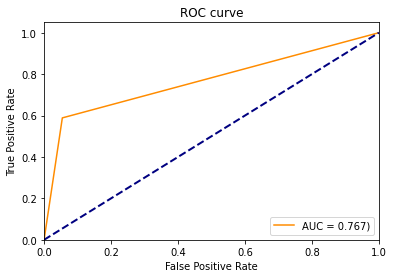

In [282]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_svm)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

## 3. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
randforest = RandomForestClassifier(random_state=10)

n_estimators = np.array([50,100,150])
max_depth = np.array([2,5,10,15])

grid = GridSearchCV(estimator=randforest, 
                    param_grid=dict(n_estimators=n_estimators,max_depth=max_depth), 
                    cv=5)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best cross validaton score", grid.best_score_)

Best params: {'max_depth': 10, 'n_estimators': 50}
Best cross validaton score 0.8531638574191766


In [21]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=10)

In [22]:
Y_predicted_rf = grid.predict(X_test)

In [23]:
accuracy_rf = metrics.accuracy_score(y_test, Y_predicted_rf)
precision_rf = metrics.precision_score(y_test,Y_predicted_rf)
recall_rf = metrics.recall_score(y_test, Y_predicted_rf)
RocAuc_rf = metrics.roc_auc_score(y_test, Y_predicted_rf)

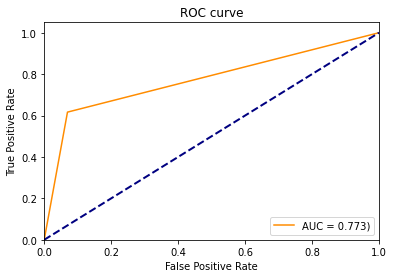

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_rf)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

In [25]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': grid.best_estimator_.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

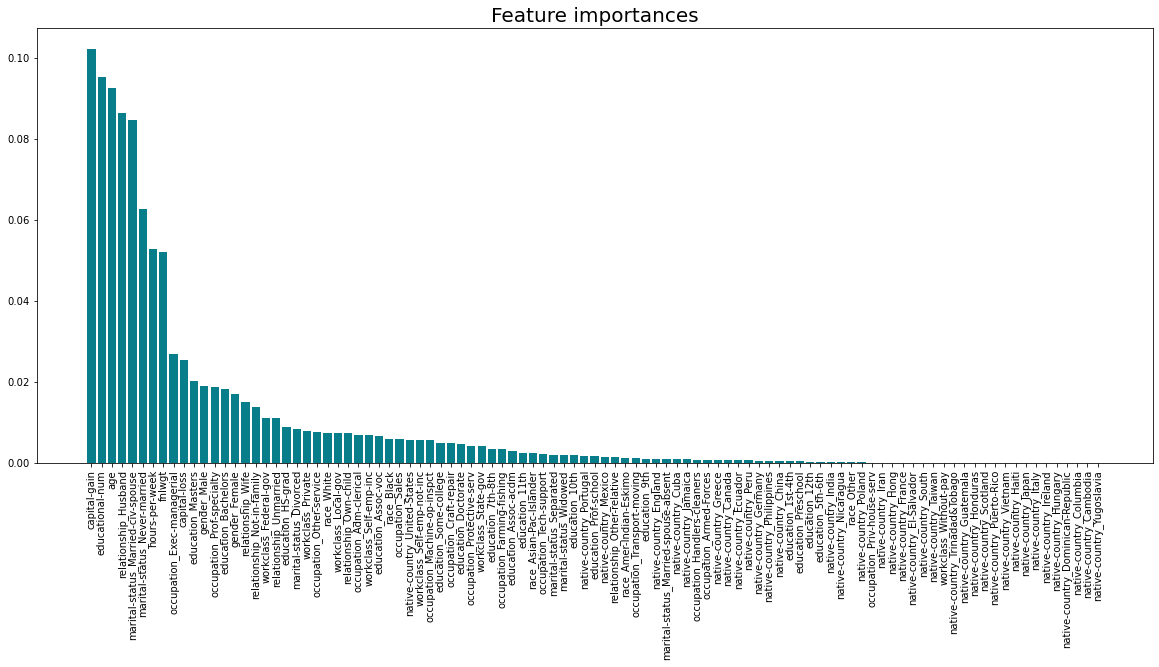

In [26]:
plt.figure(figsize=(20,8))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

Capital gain and age are the most important features

## 4. Gradient Boosting

In [2]:
from sklearn.ensemble import GradientBoostingClassifier

In [292]:
param_test1 = {'loss': ['deviance', 'exponential'],
               'n_estimators': list(range(90,110,5)),
               'criterion': ['friedman_mse', 'squared_error']
              }
gb = GradientBoostingClassifier()
gsearch1 = GridSearchCV(estimator = gb, 
    param_grid = param_test1,n_jobs=-1, cv=5, verbose = 1)

gsearch1.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [90, 95, 100, 105]},
             verbose=1)

In [293]:
gsearch1.best_estimator_

GradientBoostingClassifier(loss='exponential', n_estimators=90)

In [294]:
Y_predicted_gb = gsearch1.predict(X_test)

In [295]:
accuracy_gb = metrics.accuracy_score(y_test, Y_predicted_gb)
precision_gb = metrics.precision_score(y_test,Y_predicted_gb)
recall_gb = metrics.recall_score(y_test, Y_predicted_gb)
RocAuc_gb = metrics.roc_auc_score(y_test, Y_predicted_gb)

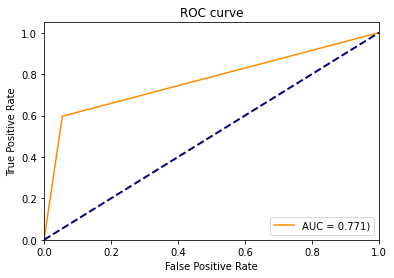

In [296]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_gb)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

<BarContainer object of 97 artists>

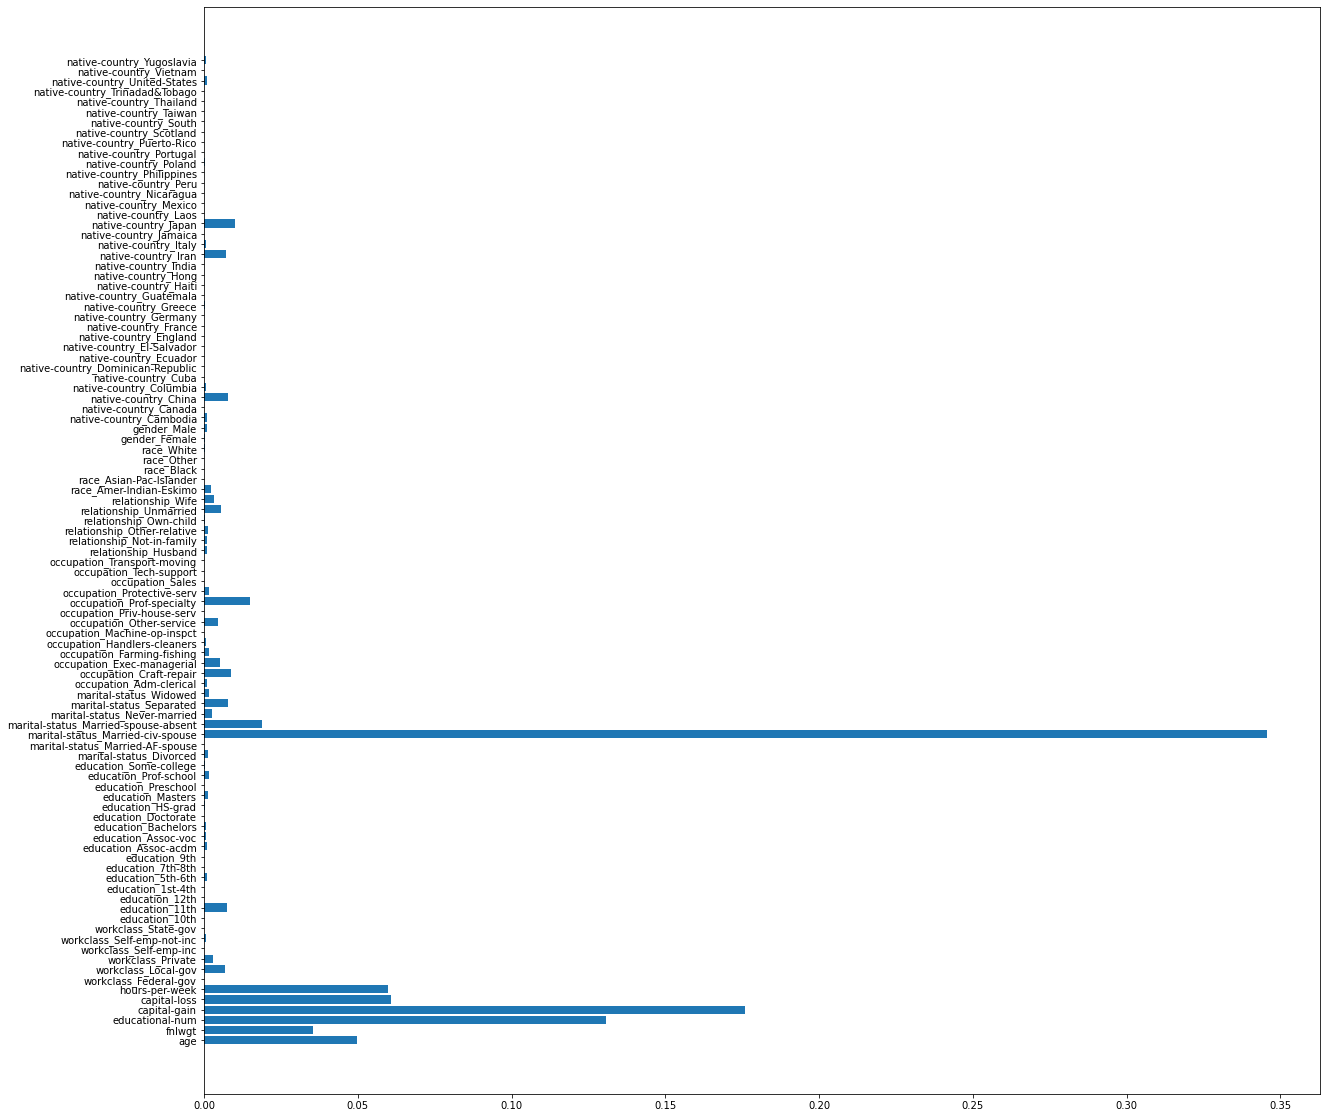

In [297]:
#variable importance
plt.figure(figsize=(20,20)) 
plt.barh(list(df_label.drop(columns = 'income_>50K').columns), gsearch1.best_estimator_.feature_importances_)

## 5. Neural Network

In [299]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import RMSprop
import multiprocessing
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score 

In [300]:
num_neurons = len(X_train.columns)

def create_model(learn_rate=0.01):
  model = Sequential()
  model.add(Dense(5, input_shape= (num_neurons,), activation='relu'))
  model.add(Dense(5, activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
  return model

seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, verbose = 1)

epochs = [10, 20, 30]
learn_rate = [0.00001, 0.0001, 0.001, 0.01, 0.1]

param_grid = dict(epochs=epochs, learn_rate=learn_rate)

grid_nn = GridSearchCV(estimator=model, param_grid=param_grid, verbose = 1, n_jobs=-1, cv=5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


In [301]:
grid_nn.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Epoch 1/10
48/48 [==============================] - 1s 2ms/step - loss: 1950.6272 - accuracy: 0.7577
Epoch 2/10
48/48 [==============================] - 0s 2ms/step - loss: 946.8765 - accuracy: 0.7590
Epoch 3/10
48/48 [==============================] - 0s 2ms/step - loss: 357.9212 - accuracy: 0.7610
Epoch 4/10
48/48 [==============================] - 0s 2ms/step - loss: 47.8010 - accuracy: 0.6909
Epoch 5/10
48/48 [==============================] - 0s 3ms/step - loss: 2.5610 - accuracy: 0.6208
Epoch 6/10
48/48 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.6752
Epoch 7/10
48/48 [==============================] - 0s 2ms/step - loss: 1.1906 - accuracy: 0.6470
Epoch 8/10
48/48 [==============================] - 0s 3ms/step - loss: 1.3217 - accuracy: 0.6418
Epoch 9/10
48/48 [==============================] - 0s 2ms/step - loss: 1.3363 - accuracy: 0.6719
Epoch 10/10
48/48 [==============================

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fe492848ad0>,
             n_jobs=-1,
             param_grid={'epochs': [10, 20, 30],
                         'learn_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1]},
             verbose=1)

In [302]:
print(grid_nn.best_params_)

{'epochs': 10, 'learn_rate': 0.001}


In [303]:
Y_predicted_nn = grid_nn.predict(X_test)
Y_predicted_nn

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [304]:
accuracy_nn = metrics.accuracy_score(y_test, Y_predicted_nn)
precision_nn = metrics.precision_score(y_test,Y_predicted_nn)
recall_nn = metrics.recall_score(y_test, Y_predicted_nn)
RocAuc_nn = metrics.roc_auc_score(y_test, Y_predicted_nn)

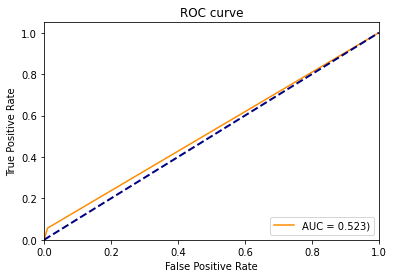

In [305]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_nn)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

## 6. Naïve Bayes

In [307]:
from sklearn.naive_bayes import GaussianNB

In [308]:
GaussianNB().get_params().keys() 

dict_keys(['priors', 'var_smoothing'])

In [309]:
gausnb = GaussianNB()
gausnb.fit(X_train, y_train)

GaussianNB()

In [310]:
print(gausnb.class_prior_)
print(gausnb.class_count_)

[0.75769483 0.24230517]
[1157.  370.]


In [311]:
Y_predicted_nb = gausnb.predict(X_test)

In [312]:
accuracy_nb = metrics.accuracy_score(y_test, Y_predicted_nb)
precision_nb = metrics.precision_score(y_test,Y_predicted_nb)
recall_nb = metrics.recall_score(y_test, Y_predicted_nb)
RocAuc_nb = metrics.roc_auc_score(y_test, Y_predicted_nb)

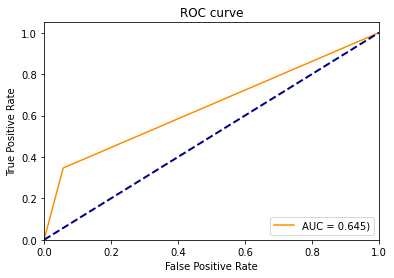

In [313]:
fpr, tpr, thresholds = roc_curve(y_test, Y_predicted_nb)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {round(roc_auc,3)})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')


plt.legend(loc="lower right")
plt.show()

## 7. Results

In [314]:
metrics_3 = pd.DataFrame({"lg":[accuracy_lg, precision_lg, recall_lg, RocAuc_lg],
                 "svm": [accuracy_svm, precision_svm, recall_svm, RocAuc_svm], 
                 "rf": [accuracy_rf, precision_rf, recall_rf, RocAuc_rf], 
                 "gb": [accuracy_gb, precision_gb, recall_gb, RocAuc_gb], 
                 "nn": [accuracy_nn, precision_nn, recall_nn, RocAuc_nn],
                 "nb": [accuracy_nb, precision_nb, recall_nb, RocAuc_nb]
                 })
          
metrics_3.index = ['Accuracy','Precision', 'Recall', 'ROC AUC']
metrics_3.columns = ['Logistic Regression', 'SVM', 'Random Forest', 'Gradient Boosting',
                'Neural Network', 'Naive Bayes']
metrics_3

,Logistic Regression,SVM,Random Forest,Gradient Boosting,Neural Network,Naive Bayes
Accuracy,0.797642,0.858546,0.876228,0.860511,0.762279,0.797642
Precision,0.684211,0.776596,0.821053,0.778947,0.636364,0.661538
Recall,0.314516,0.588710,0.629032,0.596774,0.056452,0.346774
ROC AUC,0.633881,0.767082,0.792438,0.771114,0.523031,0.644816
